# Credit Card Fraud Detection

## Problem Statement
Credit card fraud is a form of identity theft that involves an unauthorized taking of another's credit card information for the purpose of charging purchases to the account or removing funds from it.

In this project I have built a machine learning model that can accurately detect fraudulent credit card transactions based on the following features:
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud','isFlaggedFraud']

The dataset used for this project is available on Kaggle through this [link.](https://www.kaggle.com/datasets/ealaxi/paysim1)

## Installing the requirements and loading the data

In [122]:
%%writefile requirements.txt
colabcode
python-multipart
pyngrok

Overwriting requirements.txt


In [124]:
!pip install -r requirements.txt

## Data Exploration and Analysis

In [8]:
# Importing some important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
#warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
df = pd.read_csv('paysim.csv')
pd.set_option('display.max.columns', None)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
df.shape

(6362620, 11)

We can see that from the above cells the dataset has 11 columns and more than 6 million rows.
This is the basic information about the dataset gotten from kaggle:

This is a sample of 1 row with headers explanation:

* 1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0
* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
* amount - amount of the transaction in local currency.
* nameOrig - customer who started the transaction
* oldbalanceOrg - initial balance before the transaction
* newbalanceOrig - new balance after the transaction
* nameDest - customer who is the recipient of the transaction
* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [23]:
#null values if there*
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in any of the columns of the dataset.

In [25]:
len_not_fraud = len(df['isFraud'][df.isFraud == 0])
len_is_fraud = len(df['isFraud'][df.isFraud == 1])

arr = np.array([len_not_fraud, len_is_fraud])
labels = ['Not Fraudulent', 'Fraudulent']
print(f"Total No. of Non-Fraudulent Cases: {len_not_fraud}")
print(f"Total No. Fraudulent Cases: {len_is_fraud}")

Total No. of Non-Fraudulent Cases: 6354407
Total No. Fraudulent Cases: 8213


We can see that the number of fraudulent cases in the dataset is really small with only 8213 transactions out of over 6 million transactions is tagged as fraud. Therefore the dataset is highly imbalanced and some workarounds we have to be applied to fix this problem.

In [28]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [30]:
df.isFraud.nunique()

2

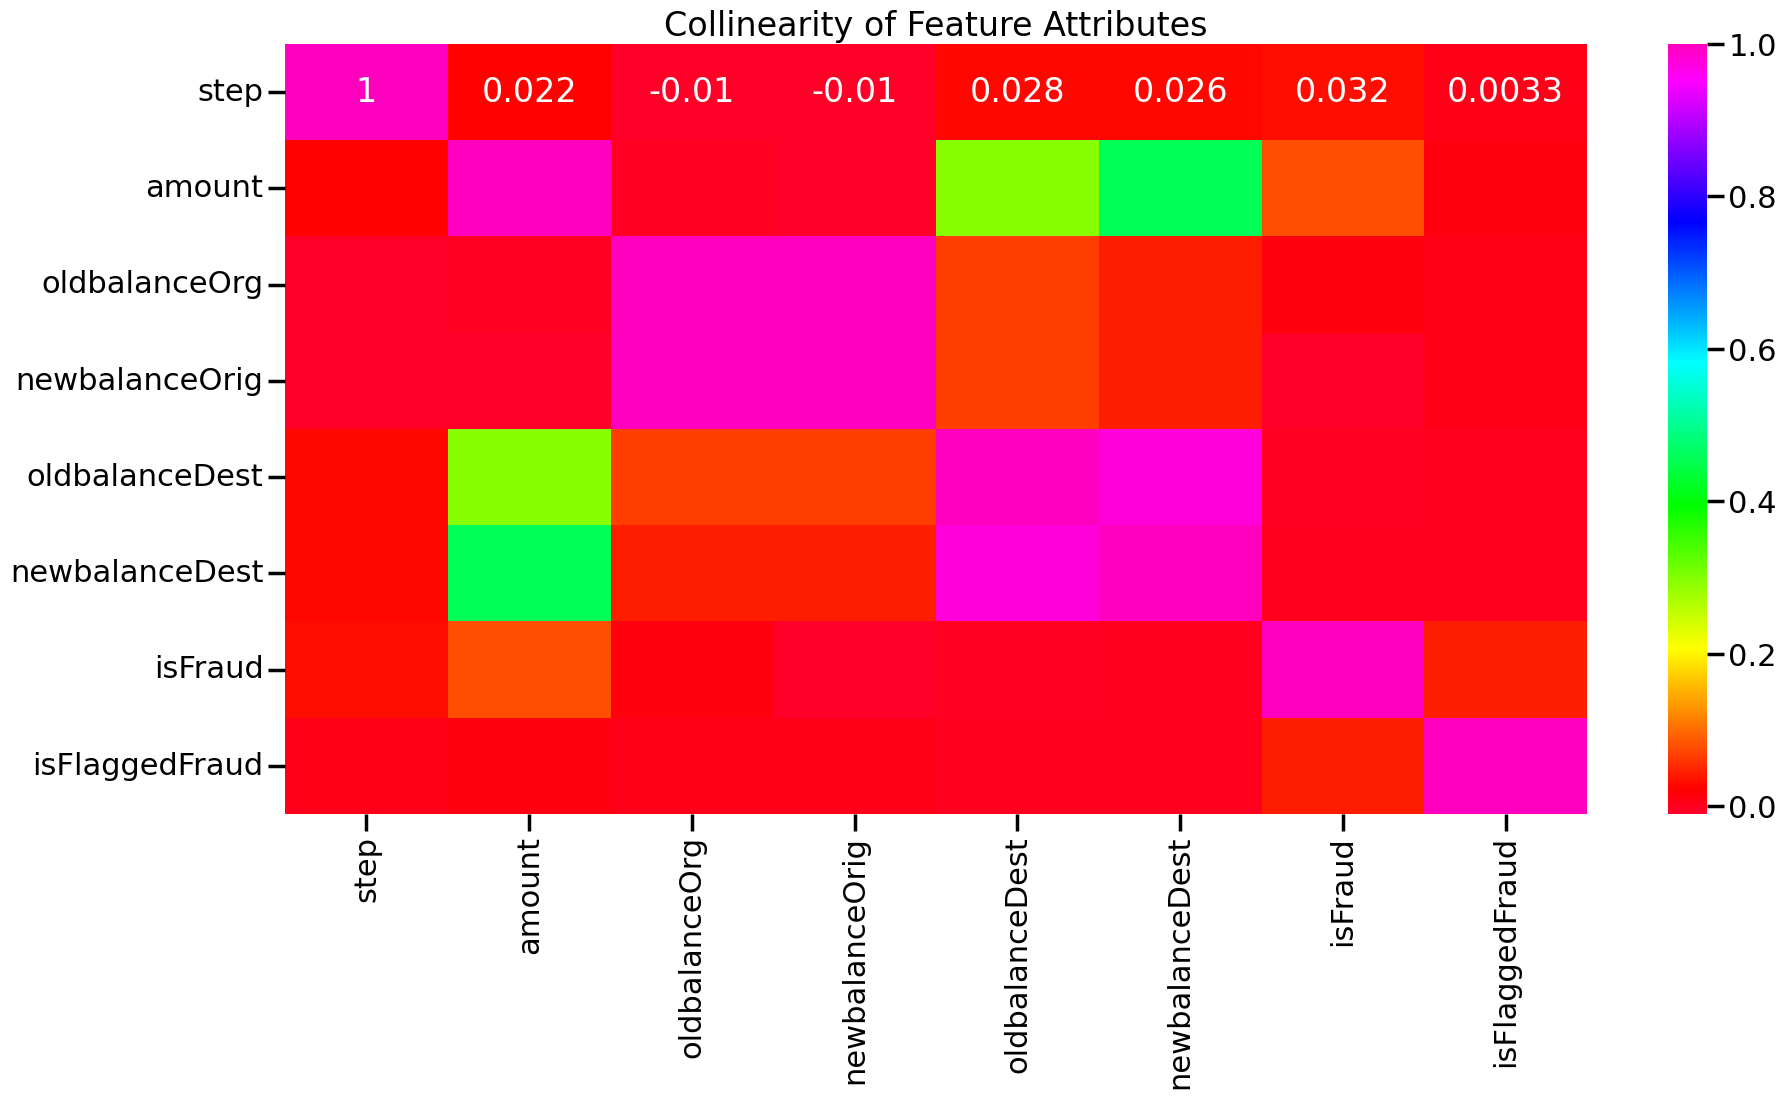

In [34]:
fig, ax = plt.subplots(figsize=(21,10))
sns.set_context('poster')
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='gist_rainbow', annot = True)
ax.set_title('Collinearity of Feature Attributes')
plt.savefig('cormap.png')

#plt.pie(arr, labels = labels, explode=[0.3, 0.0], shadow = True)
#plt.show()

In [38]:
#@title The next 3 cells contain functions for graph and chart plotting
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [40]:
#@title 
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [42]:
#@title 
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [44]:
#plotScatterMatrix(df, 20, 10)

In [46]:
# print percentage of questions where target == 1
percent = (len(df.loc[df.isFraud==1])) / (len(df.loc[df.isFraud == 0])) * 100
print(f"Percentage of Fraudulent Transanctions in the Dataset: {percent}%")

Percentage of Fraudulent Transanctions in the Dataset: 0.129248881917699%


In [48]:
df["type"].nunique()

5

In [50]:
df["type"].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

We have 5 unique columns in the "type" columns namely:
- PAYMENT
- TRANSFER 
- CASH_OUT 
- DEBIT 
- CASH_IN

These represent the type of transaction carried out in the dataset. We will be creating a new dataframe with these values converted to numerical datatypes.

In [53]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Model Building and Evaluation

### Feature Engineering
The "type" column in the dataset contains categorical data namely:
- PAYMENT
- TRANSFER
- CASH_OUT
- DEBIT
- CASH_IN

We will be using label encoding to convert the categorical data to numerical datatype.

In [57]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [59]:
data = df.copy(deep = True)

In [61]:
# get all categorical columns in the dataframe
catCols = [col for col in data.columns if data[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    data[item] = lb_make.fit_transform(data[item])


In [63]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


The type column has now been converted from a categorical datatype to numerical datatype using label encoding.

- CASH_IN = 0
- CASH_OUT = 1
- DEBIT = 2
- PAYMENT = 3
- TRANSFER = 4

In [67]:
# The function below will be used to evaluate different metrics of the algorithms used here.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    

    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)
    

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

X = data.drop('isFraud', axis=1)
y = data.isFraud


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Unique predicted labels:  [0]
Accuracy Score:  0.9986904765646856


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Precision Score:  0.0
Recall Score:  0.0
F1 Score:  0.0
Confusion Matrix:  [[1588572       0]
 [   2083       0]]


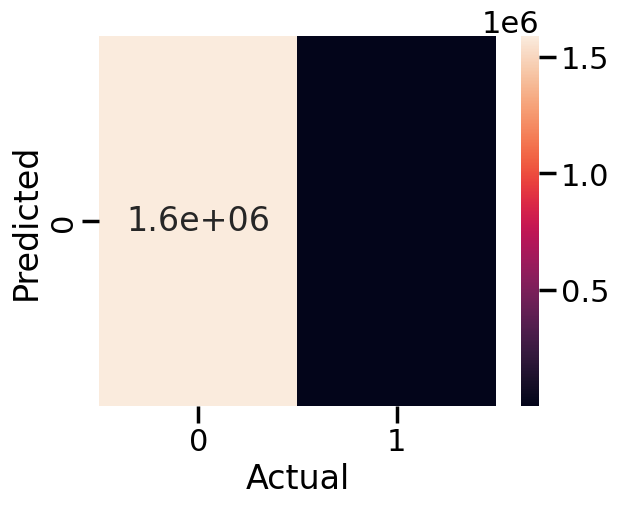

In [71]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
evaluate_model(y_test, dummy_pred)

As we can see the Dummy classifier accurately predicts non-fraudulent transactions with an accuracy of 99.8% but that is not our focus. We need to be able to accurately predict fraudulent transactions.

## Logistic Regression
Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [76]:
# Modeling the data as is
# Train model
lr = LogisticRegression()
model1 = lr.fit(X_train, y_train)
 
# Predict on training set
lr_pred = model1.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  0.9984320924399068
Precision Score:  0.4095908490981082
Recall Score:  0.4469515122419587
F1 Score:  0.42745638200183655
Confusion Matrix:  [[1587230    1342]
 [   1152     931]]


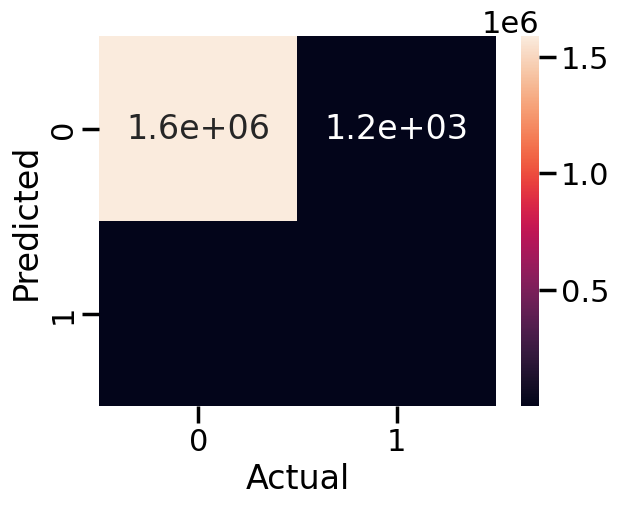

In [77]:
evaluate_model(y_test, lr_pred)

In [80]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0
0    1588382
1       2273
Name: count, dtype: int64

In [82]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,1587230,1342
1,1152,931


The Logistic Regression Model performs quite well but the recall score is still very low. More work needs to be done with the dataset.

## Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Accuracy Score:  0.9996969801748337
Precision Score:  0.9802039592081584
Recall Score:  0.7844455112818051
F1 Score:  0.8714666666666666
Confusion Matrix:  [[1588539      33]
 [    449    1634]]


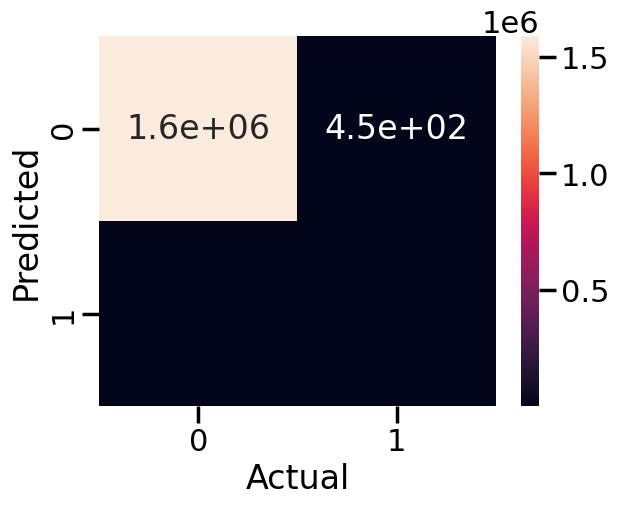

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

evaluate_model(y_test, rfc_pred)

In [88]:
# Checking unique values
predictions = pd.DataFrame(rfc_pred)
predictions[0].value_counts()

0
0    1588988
1       1667
Name: count, dtype: int64

In [90]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,1588539,33
1,449,1634


We can see that the Random Forest had the best scores so far across different metrics with a recall score of 77% and an F1 score of 86%. The next sections will look at the extreme gradient boosting classifier and gradient boosted tree classifier.

## XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

Unlike accuracy, LogLoss is robust in the presence of imbalanced classes. It takes into account the certainty of the prediction. That is the evaluation metric that will be used here.

In [100]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 4,
    'eval_metric': 'logloss',
    'subsample': 1.0
}

evals = [(dtrain, 'train'), (dtest, 'eval')]

model = xgb.train(params,
                  dtrain,
                  num_boost_round=500,
                  evals=evals,
                  early_stopping_rounds=30,
                  verbose_eval=True)

[0]	train-logloss:0.00941	eval-logloss:0.00962
[1]	train-logloss:0.00886	eval-logloss:0.00908
[2]	train-logloss:0.00548	eval-logloss:0.00561
[3]	train-logloss:0.00557	eval-logloss:0.00569
[4]	train-logloss:0.00459	eval-logloss:0.00471
[5]	train-logloss:0.00424	eval-logloss:0.00436
[6]	train-logloss:0.00398	eval-logloss:0.00411
[7]	train-logloss:0.00376	eval-logloss:0.00389
[8]	train-logloss:0.00350	eval-logloss:0.00364
[9]	train-logloss:0.00336	eval-logloss:0.00350
[10]	train-logloss:0.00323	eval-logloss:0.00338
[11]	train-logloss:0.00311	eval-logloss:0.00326
[12]	train-logloss:0.00302	eval-logloss:0.00317
[13]	train-logloss:0.00293	eval-logloss:0.00309
[14]	train-logloss:0.00287	eval-logloss:0.00303
[15]	train-logloss:0.00279	eval-logloss:0.00295
[16]	train-logloss:0.00273	eval-logloss:0.00288
[17]	train-logloss:0.00268	eval-logloss:0.00283
[18]	train-logloss:0.00263	eval-logloss:0.00278
[19]	train-logloss:0.00258	eval-logloss:0.00273
[20]	train-logloss:0.00254	eval-logloss:0.00269
[2

Accuracy Score:  0.9997661340768426
Precision Score:  0.9651984774333877
Recall Score:  0.8521363418146903
F1 Score:  0.9051504334523203
Confusion Matrix:  [[1588508      64]
 [    308    1775]]


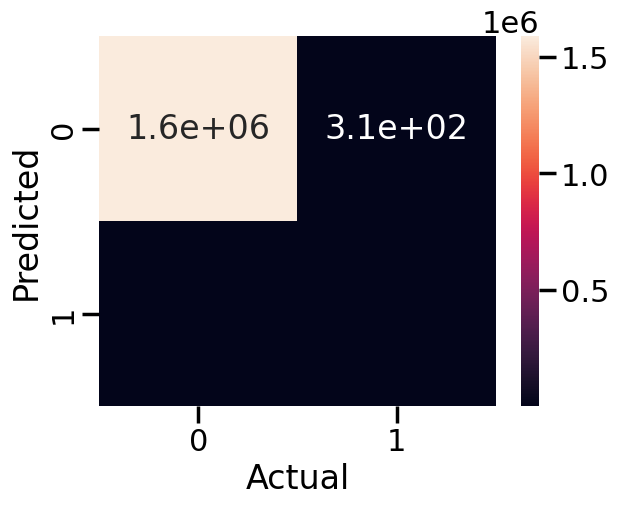

In [108]:
dtest = xgb.DMatrix(X_test)
y_proba = model.predict(dtest)
pred6 = (y_proba >= 0.5).astype(int)

# Now evaluate
evaluate_model(y_test, pred6)

In [114]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = pd.DataFrame(pred6, columns=['predicted'])

# Check distribution of predicted classes (0/1)
print("Prediction counts:")
print(predictions['predicted'].value_counts())

# Confusion matrix
cm = confusion_matrix(y_test, pred6)
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

print("\nConfusion Matrix:")
print(cm_df)

# Optional: More detailed performance
print("\nClassification Report:")
print(classification_report(y_test, pred6))

Prediction counts:
predicted
0    1588816
1       1839
Name: count, dtype: int64

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0      1588508           64
Actual 1          308         1775

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588572
           1       0.97      0.85      0.91      2083

    accuracy                           1.00   1590655
   macro avg       0.98      0.93      0.95   1590655
weighted avg       1.00      1.00      1.00   1590655



### Selecting Our Final Model

The final model used which had the best scores across all metrics will be the random forest classifier.

In [117]:
import joblib
joblib.dump(rfc, "creditFraudFinalModel.pkl")

['creditFraudFinalModel.pkl']

                                                     --- END ---